In [4]:
import pandas as pd
import urllib


In [20]:
API_KEY = "0a23bc099d920294b016a59a2ea19be2f171b410" # FIXME Set your own API key here
url = "https://api.jcdecaux.com/vls/v1/stations?apiKey={}".format(API_KEY)

In [21]:
with urllib.request.urlopen(url) as response:
    velib_data = pd.read_json(response.read())

from datetime import datetime
now = datetime.now()
date_of_data=now.strftime('%Y/%m/%d %H:%M:%S')

print ('Data retrieved on: ' + str(date_of_data))
    
velib_data.head()

Data retrieved on: 2022/01/10 21:11:54


,number,contract_name,name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update
0,9087,marseille,9087-MAZARGUES,MAZARGUES - ROND POINT DE MAZARGUES (OBELISQUE),"{'lat': 43.250903869637334, 'lng': 5.403244616...",True,False,21,12,9,OPEN,1641848729000
1,55,toulouse,00055 - SAINT-SERNIN - G. ARNOULT,2 RUE GATIEN ARNOULT,"{'lat': 43.6089519604964, 'lng': 1.4410035987262}",True,False,15,12,3,OPEN,1641848723000
2,59,ljubljana,LIDL BEŽIGRAD,Bežigrad 11,"{'lat': 46.063797, 'lng': 14.506854}",False,False,20,16,4,OPEN,1641849039000
3,2010,lyon,2010 - CONFLUENCE / DARSE,ANGLE ALLEE ANDRE MURE ET QUAI ANTOINE RIBOUD,"{'lat': 45.743317, 'lng': 4.815747}",True,False,22,3,18,OPEN,1641848970000
4,5015,lyon,5015 - FULCHIRON,Devant le n°41 rue de la Quarantaine,"{'lat': 45.75197, 'lng': 4.821662}",True,False,19,7,11,OPEN,1641848878000


In [22]:
print("There are {0} Velib stands in Paris".format(velib_data.address.count()))
print("There are {0} bike stands in total".format(velib_data.bike_stands.sum()))
print("There are {0} available bikes".format(velib_data.available_bikes.sum()))
print("There are {0} available bikes stands".format(velib_data.available_bike_stands.sum()))
print("")

bike_stands_max = velib_data.bike_stands.max()
bike_stands_max_query = "bike_stands == " + str(bike_stands_max)
print("Biggest stations with {0} bike stands:".format(bike_stands_max))
print(velib_data.query(bike_stands_max_query).address.values)
print("")

bike_stands_min = velib_data.bike_stands.min()
bike_stands_min_query = "bike_stands == " + str(bike_stands_min)
print("Smallest stations with {0} bike stands:".format(bike_stands_min))
print(velib_data.query(bike_stands_min_query).address.values)

There are 2508 Velib stands in Paris
There are 51876 bike stands in total
There are 22500 available bikes
There are 27990 available bikes stands

Biggest stations with 70 bike stands:
['Quai de Malakoff - Canal Saint-Félix']

Smallest stations with 0 bike stands:
['LPA']


In [23]:
velib_data['latitude'] = velib_data['position'].apply(lambda x: x['lat'])
velib_data['longitude'] = velib_data['position'].apply(lambda x: x['lng'])
velib_data.head()

,number,contract_name,name,address,position,banking,bonus,bike_stands,available_bike_stands,available_bikes,status,last_update,latitude,longitude
0,9087,marseille,9087-MAZARGUES,MAZARGUES - ROND POINT DE MAZARGUES (OBELISQUE),"{'lat': 43.250903869637334, 'lng': 5.403244616...",True,False,21,12,9,OPEN,1641848729000,43.250904,5.403245
1,55,toulouse,00055 - SAINT-SERNIN - G. ARNOULT,2 RUE GATIEN ARNOULT,"{'lat': 43.6089519604964, 'lng': 1.4410035987262}",True,False,15,12,3,OPEN,1641848723000,43.608952,1.441004
2,59,ljubljana,LIDL BEŽIGRAD,Bežigrad 11,"{'lat': 46.063797, 'lng': 14.506854}",False,False,20,16,4,OPEN,1641849039000,46.063797,14.506854
3,2010,lyon,2010 - CONFLUENCE / DARSE,ANGLE ALLEE ANDRE MURE ET QUAI ANTOINE RIBOUD,"{'lat': 45.743317, 'lng': 4.815747}",True,False,22,3,18,OPEN,1641848970000,45.743317,4.815747
4,5015,lyon,5015 - FULCHIRON,Devant le n°41 rue de la Quarantaine,"{'lat': 45.75197, 'lng': 4.821662}",True,False,19,7,11,OPEN,1641848878000,45.751970,4.821662


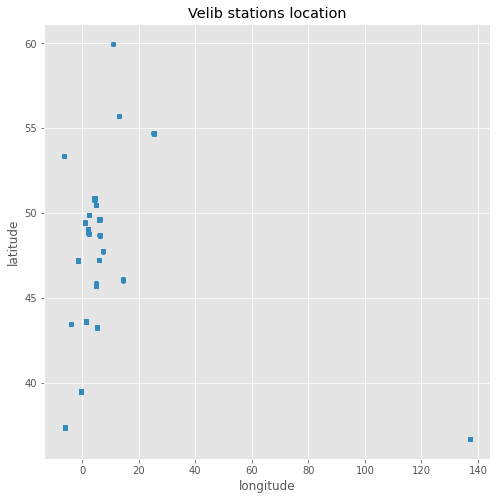

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 8))
velib_data.plot(ax = ax, kind='scatter', y='latitude', x='longitude', title='Velib stations location');

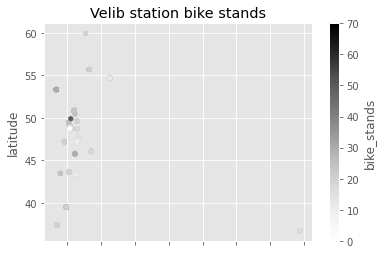

In [26]:
velib_data.plot(kind='scatter', y='latitude', x='longitude' , c='bike_stands', title='Velib station bike stands');

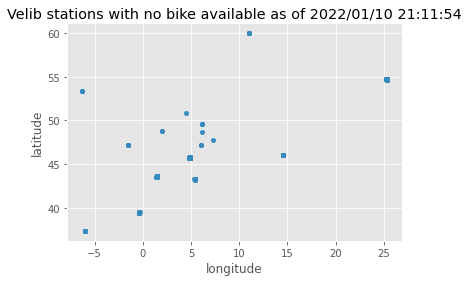

In [27]:
velib_data.query("available_bikes == 0").plot.scatter(y='latitude', x='longitude',
                                                      title='Velib stations with no bike available as of '+str(date_of_data));

In [ ]:
set(velib_data['address'])

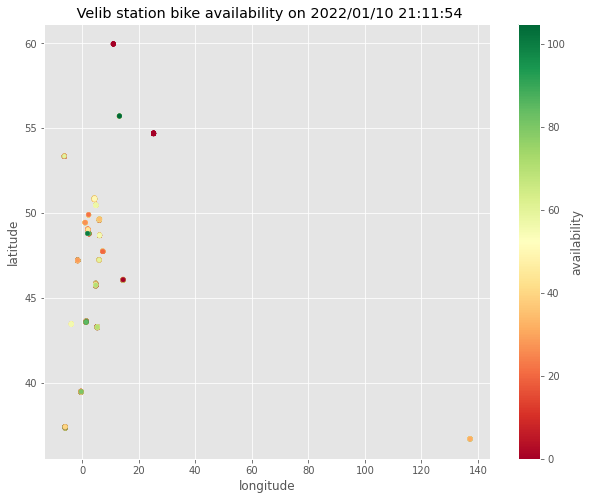

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
velib_data['availability'] = 100 * velib_data['available_bikes'] / velib_data['bike_stands']
velib_data.plot(ax = ax, kind='scatter', y='latitude', x='longitude' , c='availability', cmap=plt.get_cmap('RdYlGn'));

plt.title(' Velib station bike availability on ' + date_of_data);

In [ ]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[48.86, 2.35], zoom_start=12)

data = [[a,b,c] for a,b,c in zip(velib_data.latitude.values,
                                 velib_data.longitude.values,
                                 velib_data.availability.values) ]


## Removing Missing Value

In [40]:

df = pd.DataFrame(data)

In [42]:
df.shape

(2509, 3)

In [46]:
df.dropna(inplace=True)

In [48]:
df.shape

(2508, 3)

In [ ]:
data1=df.values.tolist()
data1

In [53]:
gradient={'0': 'Red','0.5': 'Yellow','1': 'Green'}

# plot heatmap
m.add_child(HeatMap(data1, radius=7, gradient=gradient) )

display(m)

## Return bike to place with bonuses optimisation 

In [54]:
m = folium.Map(location=[48.86, 2.35], zoom_start=12)
df = velib_data.query("bonus == True")
for lat,lon in zip(df.latitude,df.longitude):
    folium.CircleMarker(location = [lat, lon], radius=7 ).add_to(m)
display(m)